    Data Node 10. 모두카페 프로젝트
        0. 라이브러리 준비
        1. 데이터 준비
        2. 데이터 이해 
           2-1) 입장권 기준정보 data : 34행 4열
           2-2) 입장권 이용현황 data : 22555행 8열(22개 요금제명 확인 , 요금제명 null 284행, 금액 0 1449행) 
           2-3) 상품 기준정보 DATA   : 174행 4열
           2-4) 상품 판매 data       : 7105행 8열 
        3. 데이터 현황 분석
           3-1) 필수 문제1 : 월별 매출액 추세 
                - data 전처리 : sales_data : date(yyyy-mm) , payment(결제금액 > int 변환)
                - 월별 매출액 집계 및 시각화 
           3-2) 필수 문제2: 가장 인기 있는 음식/음료(salses_data를 이용합니다.)
                - 판매개수로 시각화 
                - 판매금액으로 시각화 
           3-3) 필수 문제3: 가장 많이 팔린 입장권 종류 
                - data 전처리 : entry_data(금액 > int 변환)
                - 입장권 집계 및 시각화 
                
        4. 내가 정의한 문제 해결하기 
            4-1) 데이터 전처리
            4-2) 진단 분석 
                - 입장권과 상품판매 비율 분석 
                - 고객별 매출현황 분석 : 대학생고객과 일반고객 매출 비율 분석
                - 시즌별 매출현황 분석 : 시즌에 따른 매출비율 분석
                ㅡ고객별 상품판매 비율 분석 
            4-3) 매출 전략 제시 
                - 입장권과 상품 : 입장권 판매비율이 81.5%  차지, 입장권에 대한 분석이 중요시 됨
                - 대학생 고객의 매출이 60%를 차지하여 대학생 매출 분석이 필요
                - 대학생 학기중 매출 비율이 82.9% 차지 , 비시즌(방학 중) 대책 마련 필요
                - 고객별 상품 매출 분석 : 차이가 없으며 김치볶음밥 매출이 수위
                - 전략 제시 
                  . 비시즌(방학 중) 대학생에게 할인을 적용하여 판매 유도 ( 할인율 10% : 매출,관리비용,이익 고려 판단 필요)
                  . 비시즌(방학 중) 일반 매출 확보 전략 수립 필요 ( 할인율 5%  )
                  . 상품은 전체 매출 중 17%를 점유하고 있으며 상품 개발을 통한 매출 비율 높이도록 함 (20%, 볶음밥 종류)   
         5. 배운 점
             - 처음 고객별 분석을 통해 전처리 부분을 생각하고 진행했는데 중간 부분 지나면서 너무 많은 코드에 혼란 느낌
             - 파이썬 코딩 능력 부족으로 명령 찾는데 많은 시간 허비 .. lamda 코드 역량 확보가 필요
             - 마지막으로 내가 프로그램을 한 건지 파이썬이 나를 조정한 건지 ... 지금도 멍합니다

In [298]:
#0) 라이브러리 준비
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [299]:
#1) 데이터 준비 
entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_data.csv')
item_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_data.csv')
item_entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_entry_data.csv')

In [300]:
#2-1) 입장권 기준정보 data 34행 4열
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [301]:
#2-2) 입장권 이용현황 파일 , 22555행 8열, 금액 zero 1447행 ,요금제명 null 
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [302]:
#2-3) 상품 기준정보 DATA , 174, 4열
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [303]:
#2-4) 판매 파일 7105행 8열 
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [304]:
#2-5) 입장권 데이터 확인 : 22개 요금제명 확인 , 요금제명 null 284행, 금액 0 1449행 
entry_data.head()
#entry_data['요금제명'].value_counts()
#entry_data[entry_data.isnull().any(axis=1)]
entry_data[entry_data['금액'] == 0 ]

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
15,기간권,2022-04-01 17:57,2022-04-02 2:00,오전 8:03:00,선불기2,0,퇴실,customer300766
43,기간권,2022-04-01 12:24,2022-04-01 18:09,오전 5:45:00,선불기2,0,퇴실,customer827023
50,기간권,2022-04-01 8:56,2022-04-01 18:05,오전 9:09:00,선불기2,0,퇴실,customer392176
59,기간권,2022-03-31 18:00,2022-03-31 22:01,오전 4:01:00,선불기2,0,퇴실,customer475199
60,기간권,2022-03-31 17:57,2022-04-01 2:01,오전 8:04:00,선불기2,0,퇴실,customer300766
...,...,...,...,...,...,...,...,...
22541,시간권,2021-02-17 13:23,2021-02-17 14:20,오전 12:56:00,선불기2,0,퇴실,customer428382
22542,시간권,2021-02-17 13:21,2021-02-17 13:23,오전 12:02:00,선불기1,0,퇴실,customer428382
22543,시간권,2021-02-17 13:16,2021-02-17 13:20,오전 12:04:00,선불기2,0,퇴실,customer428382
22547,시간권,2021-02-17 13:14,2021-02-17 13:21,오전 12:07:00,선불기2,0,퇴실,customer715819


In [305]:
#2-5) 상품판매 데이터 확인 : 고객 null 805행 , 결제금액 0 108행 
sales_data.count()
#sales_data[sales_data['결제금액'] == 0 ]

결제일시    7105
판매위치    7105
상품명     7105
결제방식    7105
비고      7105
판매수량    7105
결제금액    7105
고객      6300
dtype: int64

In [306]:
#3-1) 월별 매출액 추세 
# 데이터 현황 분석 .. 준비 ... 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data

In [307]:
#3-1) 월별 매출액 추세 
# 데이터 현황 분석 .. 준비 ... date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]

In [308]:
#3-1) 월별 매출액 추세 
# 데이터 현황 분석 .. 준비 ...salse_data의 결제금액에 포함된 쉼표(,) 지우기
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',', '')

In [309]:
# 3-1) 월별 매출액 추세 
# 데이터 현황 분석 .. 준비 ...salse_data의 결제금액을 숫자형태로 바꾸기
temp_var['payment'] = sales_data['결제금액'].astype(int)

In [310]:
# 3-1) 월별 매출액 추세 
# 월별 매출액 집계 ...temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['payment'].groupby(temp_var['date']).sum()
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: payment, dtype: int64

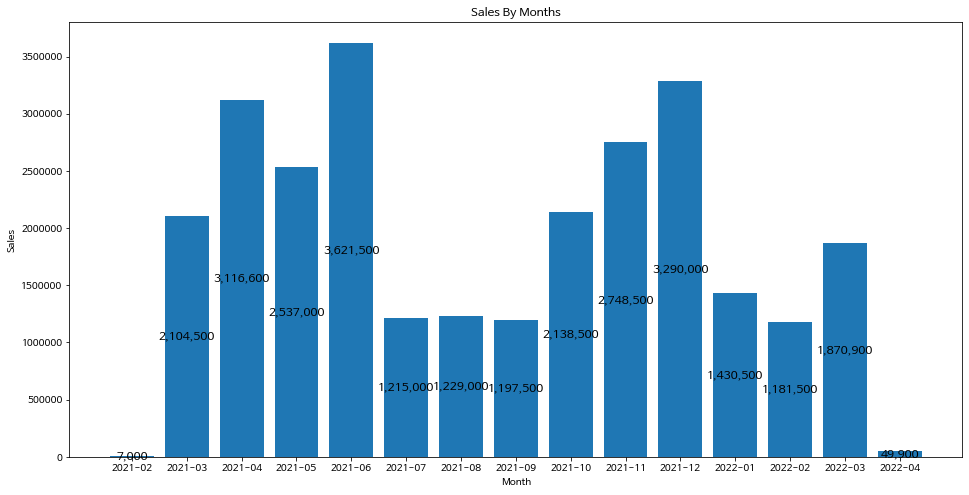

In [311]:
# 3-1) 월별 매출액 추세 
# 월별 매출액 집계 ...결과를 시각화하기  .. ax변경

plt.figure(figsize=(16,8))

ax = plt.bar(payment_data.index, payment_data)
plt.ticklabel_format(axis='y',  style = 'plain')
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center',fontsize=12)
plt.title('Sales By Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [312]:
#3-2) 가장 인기 있는 음식/음료 
#temp_var의 상품명을 value_counts를 이용해 집계하기
items_count = temp_var[temp_var['판매수량']!=-1].value_counts()
items_count

결제일시              판매위치  상품명         결제방식  비고    판매수량  결제금액  고객              date     payment
2021-10-05 13:33  선불기1  치즈추가        현금    결제완료  1     500   customer803089  2021-10  500        4
                        라면          현금    결제완료  1     4000  customer803089  2021-10  4000       4
2021-10-07 10:05  선불기1  시럽추가        신용카드  결제완료  1     500   customer777135  2021-10  500        4
2021-06-19 21:02  선불기1  라면          신용카드  결제완료  1     4000  customer283589  2021-06  4000       4
2021-06-14 11:37  선불기1  치즈추가        신용카드  결제완료  1     500   customer950393  2021-06  500        3
                                                                                               ..
2021-06-13 12:59  선불기1  계란추가        신용카드  결제완료  1     500   customer339447  2021-06  500        1
2021-06-13 11:46  선불기1  새우볶음밥       신용카드  결제완료  1     5000  customer950393  2021-06  5000       1
2021-06-13 10:33  선불기1  김치볶음밥       신용카드  결제완료  1     5000  customer983308  2021-06  5000       1
2021-06-13 10:00  선불기1  김

In [313]:
#3-2) 가장 인기 있는 음식/음료 
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(items_count)
items_count[:10]

0
결제일시             판매위치 상품명   결제방식 비고   판매수량 결제금액 고객             date    payment   
2021-10-05 13:33 선불기1 치즈추가  현금   결제완료 1    500  customer803089 2021-10 500      4
                      라면    현금   결제완료 1    4000 customer803089 2021-10 4000     4
2021-10-07 10:05 선불기1 시럽추가  신용카드 결제완료 1    500  customer777135 2021-10 500      4
2021-06-19 21:02 선불기1 라면    신용카드 결제완료 1    4000 customer283589 2021-06 4000     4
2021-06-14 11:37 선불기1 치즈추가  신용카드 결제완료 1    500  customer950393 2021-06 500      3
2021-03-23 13:41 선불기1 계란추가  신용카드 결제완료 1    500  customer556974 2021-03 500      3
2021-11-29 19:20 선불기1 김치볶음밥 신용카드 결제완료 1    5000 customer975556 2021-11 5000     3
2021-06-16 12:17 선불기1 라면    신용카드 결제완료 1    4000 customer996256 2021-06 4000     3
2021-08-22 17:12 선불기1 라면    신용카드 결제완료 1    4000 customer439220 2021-08 4000     3
2021-04-25 18:31 선불기1 김치볶음밥 신용카드 결제완료 1    5000 customer304481 2021-04 5000     3

In [314]:
#3-2) 가장 인기 있는 음식/음료 
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


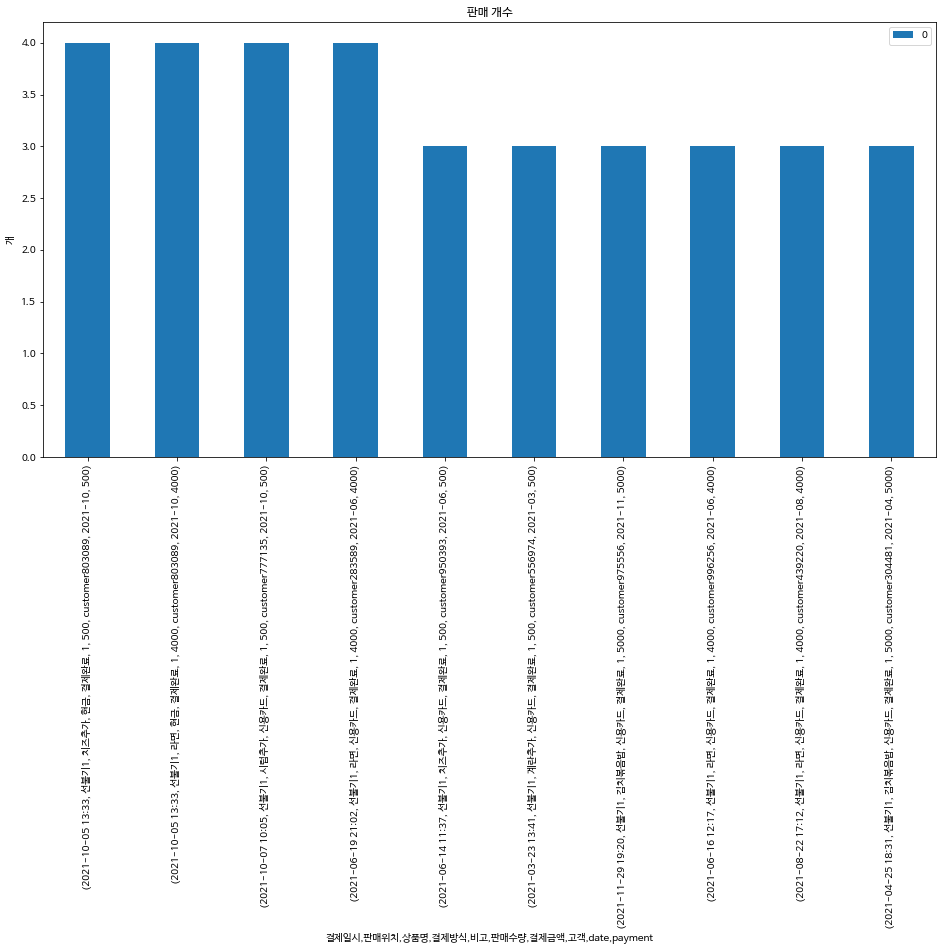

In [315]:
#3-2) 가장 인기 있는 음식/음료 
# 집계 결과를 시각화하기
items_count[:10].plot(kind='bar',figsize=(16,8))
plt.ylabel('개')
plt.title('판매 개수')
plt.show()

In [316]:
#3-2) 가장 인기 있는 음식/음료 
# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = temp_var['payment'].groupby(temp_var['상품명'][temp_var['판매수량']!=-1]).sum()
items_payment

상품명
(면)계란추가-국물라면           5000
(면)계란후라이 추가-불닭/짜장     20000
(면)치즈추가               10500
(밥)계란후라이 추가            3000
(밥)슈레드치즈추가             4500
                      ...  
한돈간장불고기덮밥            112500
한돈고추장불고기덮밥           127500
허니밀크쉐이크              114000
헤이즐넛라떼(HOT)            9000
헤이즐넛라떼(ICE)           67500
Name: payment, Length: 100, dtype: int64

In [317]:
#3-2) 가장 인기 있는 음식/음료 
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.sort_values(ascending=False)
items_payment[:10]

상품명
김치볶음밥         6004400
라면            2941500
치즈불고기볶음밥      2292600
짜장라면          2038500
낙지볶음밥         1710700
새우볶음밥         1539800
치즈감자튀김        1354200
감자튀김          1083800
아메리카노(ICE)    1058100
불닭볶음면          693000
Name: payment, dtype: int64

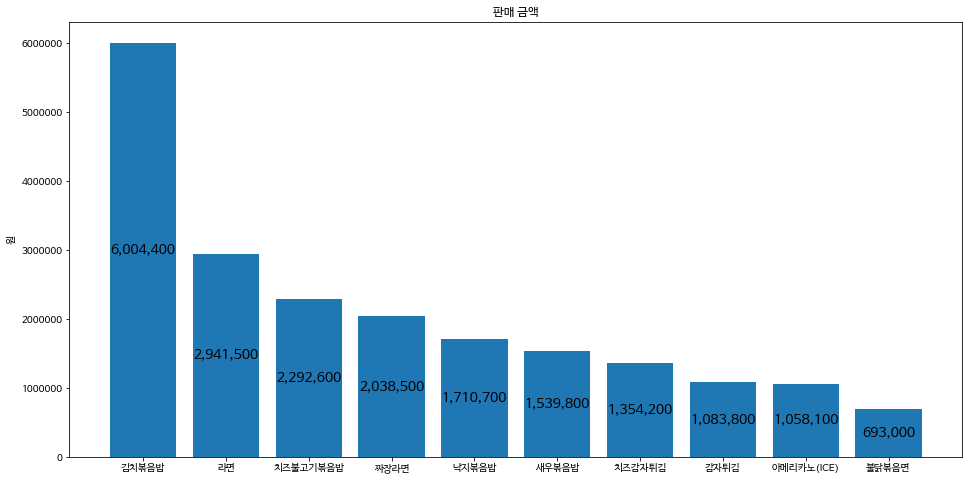

In [318]:
#3-2) 가장 인기 있는 음식/음료 
# 집계 결과 시각화하기
#items_payment[:10].plot(kind='bar')  >>> ax로 변경 

plt.figure(figsize=(16,8))

ax = plt.bar(items_payment[:10].index, items_payment[:10])
plt.ticklabel_format(axis='y',  style = 'plain')
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center',fontsize=14)
plt.ylabel('원')
plt.title('판매 금액')
plt.show()

In [319]:
#3-3) 필수 문제3: 가장 많이 팔린 입장권 종류  ..data 준비
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [320]:
#3-3) 필수 문제3: 가장 많이 팔린 입장권 종류  ..data 전처리
# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype(int)

In [321]:
#3-3) 필수 문제3: 가장 많이 팔린 입장권 종류  .. 집계 
# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()
tickets

요금제명
18시이후 무제한           1330500
1시간                   90000
1시간 요금제               14000
3시간                   21000
기간권                       0
무제한 입장권             1568600
무제한(일반요금)              6000
무제한(한국대생)             14000
시간 요금제(1시간당)          25000
시간권                       0
시간요금제                 12300
시간요금제(1시간)          2665500
시간요금제(1시간당)           22500
시간요금제(3시간)          2042000
심야-조조무제한            6221000
심야-조조무제한(06시까지)    11600000
이용권                       0
입장권(종일권)           23570500
조조무제한                693000
종일요금제                233000
한국대생 무제한 입장권        5207500
한국대생 입장권(종일권)      70037000
Name: 금액, dtype: int64

In [322]:
#3-3) 필수 문제3: 가장 많이 팔린 입장권 종류  .. top 10
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = tickets.sort_values(ascending=False)
tickets[:10]

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

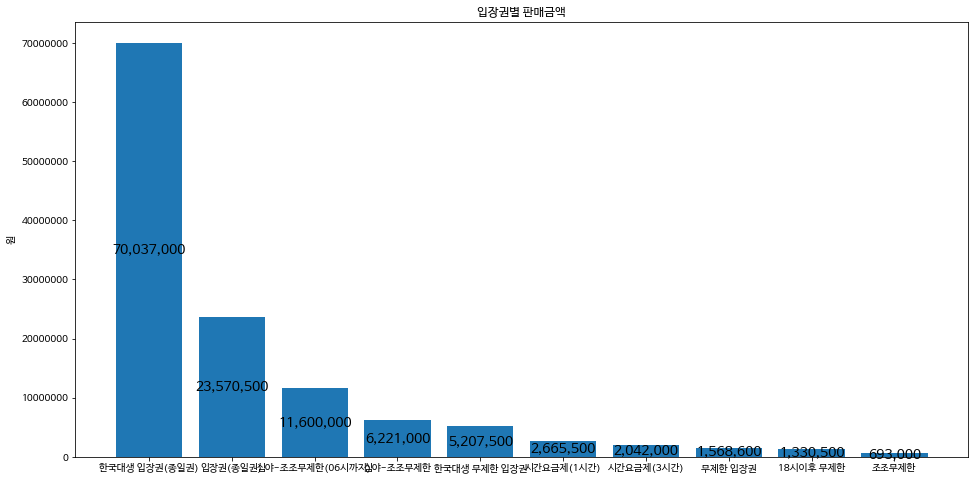

In [323]:
#3-3) 필수 문제3: 가장 많이 팔린 입장권 종류  .. 시각화 
# 집계 결과 시각화하기
#tickets[:10].plot(kind='bar')

plt.figure(figsize=(16,8))

ax = plt.bar(tickets[:10].index, tickets[:10])
plt.ticklabel_format(axis='y',  style = 'plain')
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center',fontsize=14)
plt.ylabel('원')
plt.title('입장권별 판매금액')
plt.show()

    내가 정의한 문제 해결하기-

In [324]:
#-------------------------------------------------------------------------------------------------------------------------

In [325]:
#4) data전처리 실시를 위한 temp data 생성
temp_entry = entry_data
temp_sale = sales_data

In [326]:
#4-1) data 전처리 entry_data 요금제 null 삭제 .. 금액도 0이므로 분석에 영향 없음 
temp_entry.dropna(how='all', subset=['요금제명'], inplace=True)

In [327]:
#4-1) data 전처리 entry_data class 생성 ...일반,한국대생 class 분리하여 분석 예정 
temp_entry_rs = temp_entry[temp_entry['요금제명'].str.contains('한국대생')]
temp_entry_rs['class'] = '한국대생'    #warning 발생 
temp_entry['class'] = temp_entry_rs['class']
#1) 한국대생 나머지 필드 nan : 일반으로 저장 
temp_entry['class'] = temp_entry['class'].fillna('일반')
#lambda 명령으로 변경할 것을 추천 함 .. l
temp_entry['class'].value_counts()
#한국대생    12013 ,일반      10279

한국대생    12013
일반      10279
Name: class, dtype: int64

In [328]:
#4-1) data 전처리 entry_data ..입실,퇴실,비수기 구분 ,  out_date 기준 정리 
temp_entry['indate'] = temp_entry['입실'].str[:7]
temp_entry['outdate'] = temp_entry['퇴실'].str[:7]
#전일 입실하여 다음날 퇴실 143건 정도 .. out_date 기준 활용(다음 날 퇴실시간이 많음)
temp_entry[(temp_entry['indate'] != temp_entry['outdate'])]  
temp_entry_season = temp_entry[(temp_entry['outdate'] == '2021-07')|(temp_entry['outdate'] == '2021-08')|(temp_entry['outdate'] == '2021-09')|(temp_entry['outdate'] == '2022-01')|(temp_entry['outdate'] == '2022-02')]
temp_entry_season['season'] = 'off'
temp_entry['season'] = temp_entry_season['season']
temp_entry['season'] = temp_entry['season'].fillna('peak')
temp_entry['season'].value_counts()
#peak 18250 ,off  4042

peak    18250
off      4042
Name: season, dtype: int64

In [329]:
#4-1) entry data 삭제 .. 2021-02, 2022-04 .. 사업 시작 및 data 수집 종료 시점으로 data가 적고 분석에 장애
del_index_02 = temp_entry[(temp_entry['outdate'] == '2021-02')].index
del_index_04 = temp_entry[(temp_entry['outdate'] == '2022-04')].index
temp_entry.drop(del_index_02,inplace = True)
temp_entry.drop(del_index_04, inplace = True)
temp_entry[(temp_entry['outdate'] == '2021-02')]   
temp_entry[(temp_entry['outdate'] == '2022-04')]   

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,class,indate,outdate,season


In [330]:
#4-1) sale data 삭제 .. 2021-02, 2022-04 .. 사업 시작 및 data 수집 종료 시점으로 data가 적고 분석에 장애
# temp_sale의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_sale['date'] = temp_sale['결제일시'].str[:7]
## temp_sale의 payment열 만들고, 결제금액 정수화
temp_sale['payment'] = temp_sale.결제금액.str.replace(',', '').astype('int64')
temp_sale = temp_sale[(temp_sale['판매수량']!=-1)]

In [331]:
#4-1) data 전처리 temp_sale .. class 추가 .. 고객별 상품 분석 시 활용 할 예정 
cnt = 0 
for i in temp_sale['고객']:
    for j in temp_entry['고객']:
        if i == j:
            temp_sale['class'] = temp_entry['class']
            cnt += 1
      

In [332]:
#4-1) data 전처리 temp_sale
temp_sale['class'].value_counts()

한국대생    3786
일반      3051
Name: class, dtype: int64

In [333]:
#4-2) 입장권과 상품판매 비율 분석 
entry_amt = temp_entry['금액'].sum()
sales_amt = temp_sale['payment'].sum()
# 입장권 124,704,000 , 상품 278,319,800 (판매 취소 -581,900)
print(entry_amt)
print(sales_amt)

124704000
28319800


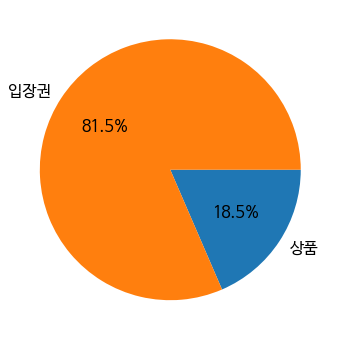

In [334]:
#4-2) 입장권과 상품판매 비율 분석 .. 시각화

plt.figure(figsize=(10,6))
total_sales = (sales_amt/(sales_amt+entry_amt))*100
total_entry = (entry_amt/(sales_amt+entry_amt))*100
grouped_series = pd.Series([total_sales, total_entry], index = ['상품', '입장권'])
plt.pie(grouped_series, labels = grouped_series.index, autopct = '%.1f%%',textprops = {'fontsize' :16},counterclock= False)
plt.show()
#입장권 매출이 81.5% 차지

In [335]:
#4-2) 고객별 매출현황 분석 : 대학생고객과 일반고객 매출 비율 집계
grouped_class = temp_entry['금액'].groupby(temp_entry['class']).sum()
grouped_class

class
일반      49759700
한국대생    74944300
Name: 금액, dtype: int64

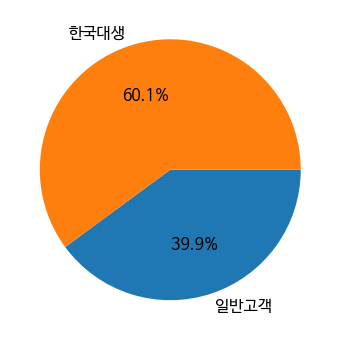

In [336]:
#4-2) 고객별 매출현황 분석 : 대학생고객과 일반고객 매출 비율 시각화


plt.figure(figsize=(10,6)) 
grouped_class_gener = (grouped_class[0]/(grouped_class[0]+grouped_class[1]))*100
grouped_class_univer = (grouped_class[1]/(grouped_class[0]+grouped_class[1]))*100

grouped_series = pd.Series([grouped_class_gener, grouped_class_univer], index = ['일반고객', '한국대생'])
plt.pie(grouped_series, labels = grouped_series.index, autopct = '%.1f%%',textprops = {'fontsize' :16}, counterclock= False)
plt.show()
# 모두까페의 매출의 60%를 한국대생이 차지하고 있다 

In [337]:
#4-2) 고객별 매출현황 분석 : 대학생고객과 일반고객 매출 비율 시각화

grouped = temp_entry['금액'].groupby([temp_entry['outdate'], temp_entry['class']]).sum()


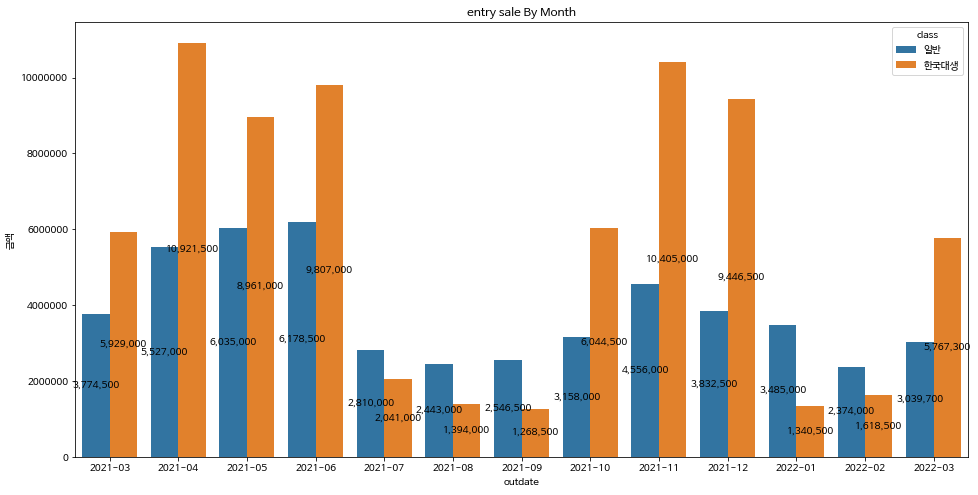

In [338]:
#4-2) 고객별 매출현황 분석 : 대학생고객과 일반고객 매출 비율 시각화

plt.figure(figsize=(16,8))

ax = sns.barplot(data=grouped.reset_index(), x='outdate', y='금액', hue='class')

containers = ax.containers[-1]
containers0 = ax.containers[0]
plt.ticklabel_format(axis='y',  style = 'plain')
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center',fontsize=10)

plt.title('entry sale By Month')
plt.show()
#한국대생 학기중 모두까페 매출이 일반보다 많았슴

In [339]:
#4-2) 시즌별 매출현황 분석 : 시즌에 따른 매출비율 분석
#grouped['class'].value_counts()
grouped_season = temp_entry['금액'].groupby(temp_entry['season']).sum()
grouped_season

season
off      21321000
peak    103383000
Name: 금액, dtype: int64

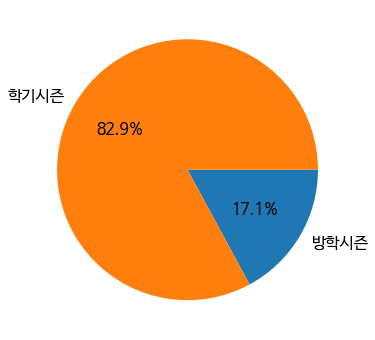

In [340]:
#4-2) 시즌별 매출현황 분석 : 시즌에 따른 매출비율 분석

plt.figure(figsize=(10,6))
grouped_class_peak = (grouped_season[1]/(grouped_season[0]+grouped_season[1]))*100
grouped_class_off = (grouped_season[0]/(grouped_season[0]+grouped_season[1]))*100
grouped_series = pd.Series([grouped_class_off, grouped_class_peak], index = ['방학시즌', '학기시즌'])
plt.pie(grouped_series, labels = grouped_series.index, autopct = '%.1f%%',textprops = {'fontsize' :16},counterclock= False)
plt.show()
# 모두까페의 매출의 83%를 한국대의 학기중에 발생되고 있다. 

In [341]:
#4-2) 고객별 상품판매 비율 분석
temp_sale['class'].value_counts()

한국대생    3786
일반      3051
Name: class, dtype: int64

In [342]:
#4-2) 고객별 상품판매 비율 분석 .. class별 상품 집계
grouped_sales_class = temp_sale['payment'].groupby([temp_sale['class']]).sum()
grouped_sales_class

class
일반      12399300
한국대생    15439200
Name: payment, dtype: int64

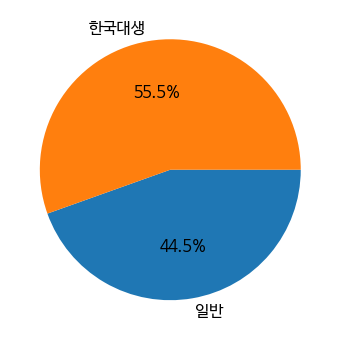

In [343]:
#4-2) 고객별 상품판매 비율 분석 .. class별 상품 집계

plt.figure(figsize=(10,6))
grouped_sales_class_gen = (grouped_sales_class[0]/(grouped_sales_class[0]+grouped_sales_class[1]))*100
grouped_sales_class_uni = (grouped_sales_class[1]/(grouped_sales_class[0]+grouped_sales_class[1]))*100
grouped_series = pd.Series([grouped_sales_class_gen, grouped_sales_class_uni], index = ['일반', '한국대생'])
plt.pie(grouped_series, labels = grouped_series.index, autopct = '%.1f%%',textprops = {'fontsize' :16},counterclock= False)
plt.show()
# 대학생 매출 비율이 55.5% 점유, 입장권에 비해 대학생의 상품비율은 다소 떨어짐 

In [344]:
#4-2) 고객별 상품판매 비율 분석 .. 대학생의 상품 집계
temp_sales_class_uni = temp_sale_class[(temp_sale_class['class'] == '한국대생')]
temp_sales_class_uni['payment'].sum()

15439200

In [345]:
#4-2) 고객별 상품판매 비율 분석 .. 대학생 top10
temp_sales_class_uni_top10 = temp_sales_class_uni['payment'].groupby(temp_sales_class_uni['상품명']).sum()
temp_sales_class_uni_top10 = temp_sales_class_uni_top10.sort_values(ascending=False)
temp_sales_class_uni_top10[:10]

상품명
김치볶음밥         3299100
라면            1616000
치즈불고기볶음밥      1276300
짜장라면          1150500
낙지볶음밥          970900
새우볶음밥          747100
치즈감자튀김         726400
감자튀김           587000
아메리카노(ICE)     538800
불닭볶음면          396000
Name: payment, dtype: int64

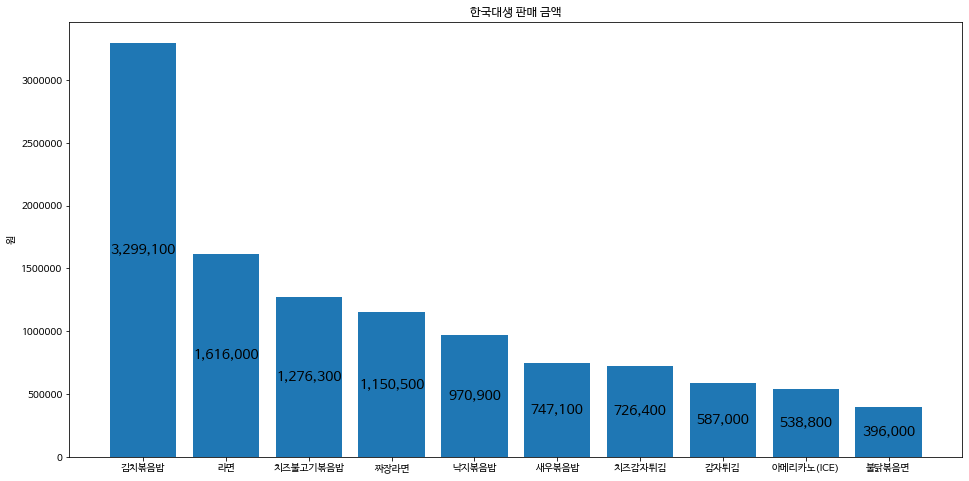

In [346]:
#4-2) 고객별 상품판매 비율 분석 .. 대학생 top10 시각화

plt.figure(figsize=(16,8))

ax = plt.bar(temp_sales_class_uni_top10[:10].index, temp_sales_class_uni_top10[:10])
plt.ticklabel_format(axis='y',  style = 'plain')
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center',fontsize=14)
plt.ylabel('원')
plt.title('한국대생 판매 금액')
plt.show()

In [347]:
#4-2) 고객별 상품판매 비율 분석 .. 일반 집계
temp_sales_class_gen = temp_sale_class[(temp_sale_class['class'] == '일반')]
temp_sales_class_gen['payment'].sum()

12399300

In [348]:
#4-2) 고객별 상품판매 비율 분석 .. 일반top10
temp_sales_class_gen_top10 = temp_sales_class_gen['payment'].groupby(temp_sales_class_gen['상품명']).sum()
temp_sales_class_gen_top10 = temp_sales_class_gen_top10.sort_values(ascending=False)
temp_sales_class_gen_top10[:10]

상품명
김치볶음밥         2613100
라면            1261500
치즈불고기볶음밥       994300
짜장라면           864000
새우볶음밥          781800
낙지볶음밥          728800
치즈감자튀김         622300
아메리카노(ICE)     510500
감자튀김           464500
만두라면           323000
Name: payment, dtype: int64

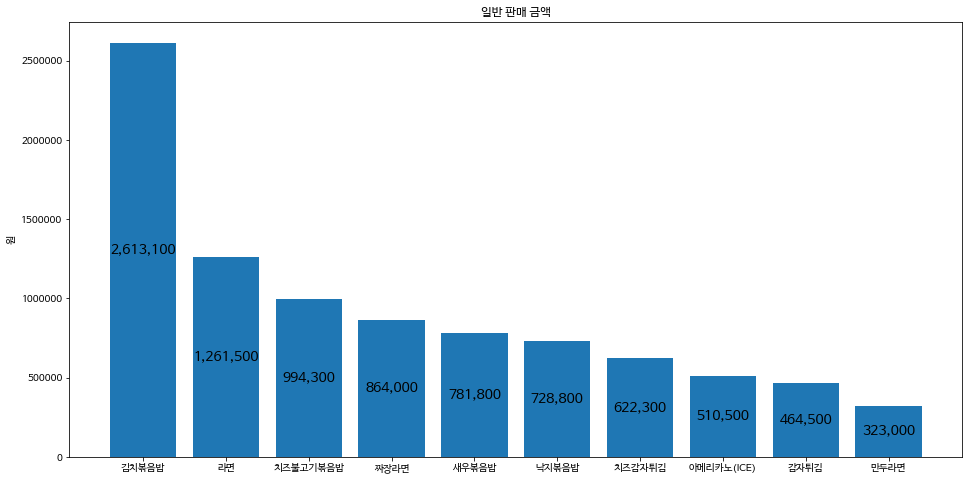

In [349]:
#4-2) 고객별 상품판매 비율 분석 .. 일반top10 시각화 

plt.figure(figsize=(16,8))

ax = plt.bar(temp_sales_class_gen_top10[:10].index, temp_sales_class_gen_top10[:10])
plt.ticklabel_format(axis='y',  style = 'plain')
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center',fontsize=14)
plt.ylabel('원')
plt.title('일반 판매 금액')
plt.show()